In [1]:
import os
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
import torch

from config import *


In [18]:
def visualize_ops(data, plt_list):
    if data["children"]:
        for k, v in data["children"].items():
            if v["children"]:
                plt_list = visualize_ops(v, plt_list)
            else:
                plt_list.append(v)
    return plt_list

In [23]:
with open("../decode.json", "r") as data: 
    _data = json.load(data)
    plt_list = []
    plt_list = visualize_ops(_data, plt_list)

In [26]:
import pprint
pprint.pprint(plt_list)

[{'arith_intensity': 7.983908430566201,
  'bound': 'memory',
  'children': {},
  'inference_time': 0.0005440779245478036,
  'max_perf': 312000000000000.0,
  'mem': 1052790784,
  'mem_bandwidth': 1935000000000.0,
  'name': 'head',
  'ops': 8405385216,
  'performance': 15448862813145.6},
 {'arith_intensity': 1.75,
  'bound': 'memory',
  'children': {},
  'inference_time': 6.77374677002584e-08,
  'max_perf': 77970000000000.0,
  'mem': 131072,
  'mem_bandwidth': 1935000000000.0,
  'name': 'attention_norm',
  'ops': 229376,
  'performance': 3386250000000.0},
 {'arith_intensity': 7.968871595330739,
  'bound': 'memory',
  'children': {},
  'inference_time': 1.7408529198966407e-05,
  'max_perf': 312000000000000.0,
  'mem': 33685504,
  'mem_bandwidth': 1935000000000.0,
  'name': 'gqa.q_proj',
  'ops': 268435456,
  'performance': 15419766536964.98},
 {'arith_intensity': 7.922630560928433,
  'bound': 'memory',
  'children': {},
  'inference_time': 4.377533850129199e-06,
  'max_perf': 312000000000

In [27]:
figure = plt.Figure(figsize=(12.8, 12.8), dpi=200)

_x_list_tc = []
_y_list_tc = []
_x_list_cc = []
_y_list_cc = []

for op in plt_list:
    if op["max_perf"] == GLOBAL_CONFIG.device.peak_performance:
        _x_list_tc.append(op["arith_intensity"])
        _y_list_tc.append(op["performance"])
    else:
        _x_list_cc.append(op["arith_intensity"])
        _y_list_cc.append(op["performance"])


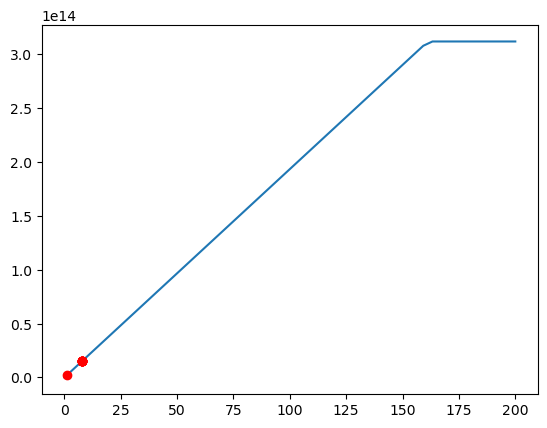

In [29]:
x = np.linspace(0, 200)
tc_y = np.array([min(GLOBAL_CONFIG.device.dram_bandwidth*_x, GLOBAL_CONFIG.device.peak_performance) for _x in x])

plt.plot(x, tc_y)
plt.plot(_x_list_tc, _y_list_tc, 'ro', label="TC")
# plt.plot(_x_list_cc, _y_list_cc, 'bo', label="CC")
plt.show()